In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
porometer = pd.read_csv("./porometer.all.days.csv")

In [24]:
porometer.head()

,pot,leaf,population,pop.short,pop.geno,elevation,genotype,rep,observation,am.pm,...,treatment.levels,gsw,rh,t.ref,t.leaf,delta.t,svp,lsvp,vpd,vpd.kpa
0,1,1,NRV-NEW,NRV,NRV101,666,101,4,172,am,...,predrought,0.210,21.31,40.59,34.34,6.25,7609.80,5420.20,3798.55,3.80
1,1,1,NRV-NEW,NRV,NRV101,666,101,4,173,am,...,predrought,0.342,21.42,40.60,35.17,5.43,7613.83,5675.10,4044.22,4.04
2,1,2,NRV-NEW,NRV,NRV101,666,101,4,174,am,...,predrought,0.158,20.51,40.61,36.70,3.91,7617.88,6172.31,4609.88,4.61
3,1,2,NRV-NEW,NRV,NRV101,666,101,4,175,am,...,predrought,0.239,20.13,40.64,36.36,4.28,7630.01,6058.67,4522.75,4.52
4,1,3,NRV-NEW,NRV,NRV101,666,101,4,176,am,...,predrought,0.181,19.79,40.66,36.35,4.31,7638.11,6055.36,4543.78,4.54


In [25]:
porometer['datetime'] = pd.to_datetime(porometer['date'] + ' ' + porometer['time'])
porometer['date'] = porometer['datetime'].dt.floor('H')
average_t_ref_per_day = porometer[porometer['pop.short'] == 'CCR'].groupby('date')['t.ref'].mean()
average_t_ref_per_day.index = pd.to_datetime(average_t_ref_per_day.index)

/var/folders/7j/q2dhdjfx5g101s145schqgrm0000gn/T/ipykernel_24914/3424881291.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  porometer['datetime'] = pd.to_datetime(porometer['date'] + ' ' + porometer['time'])
/var/folders/7j/q2dhdjfx5g101s145schqgrm0000gn/T/ipykernel_24914/3424881291.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  porometer['date'] = porometer['datetime'].dt.floor('H')


In [26]:
average_t_ref_per_day

date
2023-07-20 07:00:00    34.594167
2023-07-20 08:00:00    39.044444
2023-07-20 16:00:00    46.740000
2023-07-21 07:00:00    34.386667
2023-07-21 08:00:00    36.490000
2023-07-21 15:00:00    45.303125
2023-07-21 16:00:00    45.925556
2023-08-09 07:00:00    34.903889
2023-08-09 08:00:00    36.341111
2023-08-09 15:00:00    42.585238
2023-08-09 16:00:00    44.013333
2023-08-10 07:00:00    34.899545
2023-08-10 08:00:00    35.598462
2023-08-10 09:00:00    35.330000
2023-08-10 15:00:00    42.916000
2023-08-10 16:00:00    43.038333
2023-08-16 07:00:00    33.184333
2023-08-16 08:00:00    36.783333
2023-08-16 15:00:00    45.288571
2023-08-16 16:00:00    46.151667
2023-08-17 07:00:00    34.955000
2023-08-17 08:00:00    37.181667
2023-08-17 15:00:00    46.284333
2023-08-17 16:00:00    47.070000
2023-08-23 07:00:00    32.028667
2023-08-23 08:00:00    35.133333
2023-08-23 15:00:00    41.376000
2023-08-23 16:00:00    40.933333
2023-08-24 08:00:00    34.507037
2023-08-24 15:00:00    42.581176
2023-

In [27]:
weather_close = pd.read_csv("230926_DBG_cottonwood_weather_clean.csv")

In [28]:
weather_close.head()

,TIMESTAMP,RECORD,DateTime(1),DateTime(9),DateTime(4),DateTime(5),Target,BattVolt_Avg,Pnl_Tmp_Avg,WindSpeed_Avg,...,TbodyC_Avg(1),TbodyC_Avg(2),TtarRC_Avg,TtarHC_Avg,TadjH_Avg,T_Diffrns_Avg,PID_out_Avg,PID_lmt_Avg,ScldOut_Avg,TrelayBox_Avg
0,2023-07-20 09:10:00,0,2023,201,9,10,3,13.58706,40.57328,0.591333,...,NAN,-273.15,NAN,NAN,NAN,NAN,NAN,NAN,NAN,39.85889
1,2023-07-20 09:15:00,1,2023,201,9,15,3,13.58919,40.83521,1.151000,...,NAN,-273.15,NAN,NAN,NAN,NAN,NAN,NAN,NAN,40.31171
2,2023-07-20 09:20:00,2,2023,201,9,20,3,13.56165,41.22749,0.845133,...,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,40.81530
3,2023-07-20 09:25:00,3,2023,201,9,25,3,13.57002,41.45853,1.050300,...,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,40.10521
4,2023-07-20 09:30:00,4,2023,201,9,30,3,13.55727,41.29865,0.952267,...,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,40.91309


In [29]:
weather_close['date'] = weather_close['TIMESTAMP'].apply(
    lambda x: (
        pd.to_datetime(x[:10]) + pd.Timedelta(days=1)
    ).strftime("%Y-%m-%d 00:00:00") if x[11:19] == "24:00:00" else x
)
weather_close['date'] = pd.to_datetime(weather_close['date'], format="%Y-%m-%d %H:%M:%S")
weather_close['date'] = weather_close['date'].dt.floor('H')
average_air_temp_per_day = weather_close.groupby('date')['AirT_Avg'].mean()
average_air_temp_per_day

/var/folders/7j/q2dhdjfx5g101s145schqgrm0000gn/T/ipykernel_24914/2756550905.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_close['date'] = weather_close['date'].dt.floor('H')


date
2023-07-20 09:00:00    38.311751
2023-07-20 10:00:00    39.842261
2023-07-20 11:00:00    41.349068
2023-07-20 12:00:00    42.665915
2023-07-20 13:00:00    43.936833
                         ...    
2023-09-26 05:00:00    19.999989
2023-09-26 06:00:00    19.844784
2023-09-26 07:00:00    24.066941
2023-09-26 08:00:00    27.055440
2023-09-26 09:00:00    30.123103
Name: AirT_Avg, Length: 1633, dtype: float64

In [30]:
weather_far = pd.read_csv("weather_community_garden_211029-240630.csv")
weather_far['date'] = pd.to_datetime(weather_far['Date.Time'], format="%m/%d/%Y %H:%M")
weather_far['date'] = weather_far['date'].dt.floor('H')
average_air_temp_far_per_day = weather_far.groupby('date')['Temp.C'].mean()
average_air_temp_far_per_day

/var/folders/7j/q2dhdjfx5g101s145schqgrm0000gn/T/ipykernel_24914/1062566060.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_far['date'] = weather_far['date'].dt.floor('H')


date
2021-10-29 10:00:00    28.6555
2021-10-29 11:00:00    30.6595
2021-10-29 12:00:00    31.8045
2021-10-29 13:00:00    32.9240
2021-10-29 14:00:00    34.2235
                        ...   
2024-06-30 06:00:00    32.1885
2024-06-30 07:00:00    33.8225
2024-06-30 08:00:00    34.4010
2024-06-30 09:00:00    35.7310
2024-06-30 10:00:00    38.0600
Name: Temp.C, Length: 23401, dtype: float64

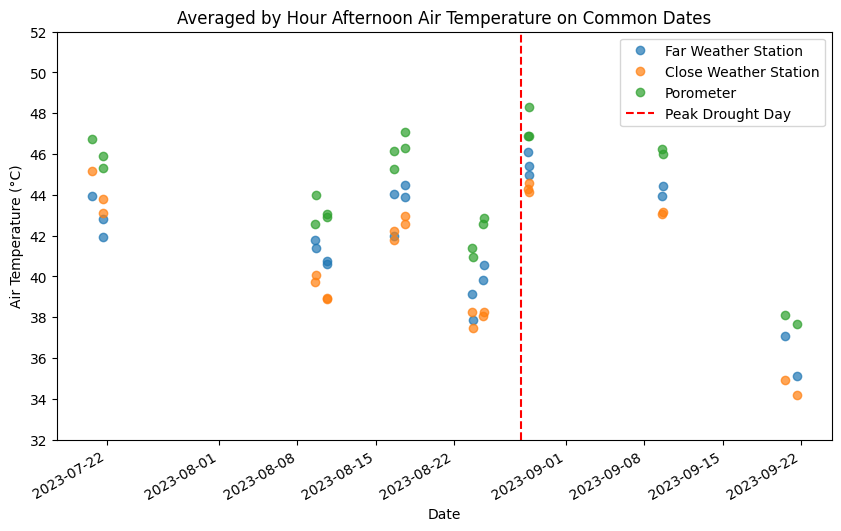

In [31]:
# Align the indices of the two datasets
common_dates = average_air_temp_per_day.index.intersection(
    pd.to_datetime(average_t_ref_per_day.index).intersection(average_air_temp_far_per_day.index)
)

# Filter for afternoon dates (12:00 PM to 6:00 PM)
afternoon_dates = common_dates[(common_dates.hour >= 12)]

# Plot far
# Plot far as scatter
average_air_temp_far_per_day[afternoon_dates].plot(style='o', label="Far Weather Station", alpha=0.7)
# Plot the close air temperature as scatter
average_air_temp_per_day[afternoon_dates].plot(style='o', title="Averaged by Hour Air Temperature on Common Dates", xlabel="Date", figsize=(10, 6), label="Close Weather Station", alpha=0.7)
# Plot the t.ref values as scatter
average_t_ref_per_day[afternoon_dates].plot(style='o', title="Averaged by Hour Afternoon Air Temperature on Common Dates", ylabel="Air Temperature (°C)", xlabel="Date", figsize=(10, 6), label="Porometer", alpha=0.7)
plt.axvline(pd.Timestamp('2023-08-28'), color='red', linestyle='--', label='Peak Drought Day')
plt.yticks(ticks=range(int(average_t_ref_per_day[afternoon_dates].min()) - 5, int(average_t_ref_per_day[afternoon_dates].max()) + 5, 2))
plt.legend()
plt.show()